In [ ]:
# IMPORTANT: SOME KAGGLE DATA SOURCES ARE PRIVATE
# RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES.
import kagglehub
kagglehub.login()


In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

paulaman850_dataset_path = kagglehub.dataset_download('paulaman850/dataset')

print('Data source import complete.')


**After downloading and seperating required class from kaggle folder**

**Splitting of data into train and test dataset**

In [ ]:
from sklearn.model_selection import train_test_split
import os
import shutil

# Define your dataset paths
dataset_dir = 'path/to/your/dataset'
classes = ['normal', 'dr', 'glaucoma', 'optic atrophy', 'mac']
train_dir = 'path/to/train'
#val_dir = 'path/to/validation'
test_dir = 'path/to/test'

# Create directories for training, validation, and testing sets
for dir_path in [train_dir,  test_dir]:
    for cls in classes:
        os.makedirs(os.path.join(dir_path, cls), exist_ok=True)

# Split data
for cls in classes:
    cls_dir = os.path.join(dataset_dir, cls)
    files = os.listdir(cls_dir)
    train_files, test_files = train_test_split(files, test_size=0.2, random_state=42)
    #val_files, test_files = train_test_split(test_files, test_size=0.5, random_state=42)

    for f in train_files:
        shutil.copy(os.path.join(cls_dir, f), os.path.join(train_dir, cls, f))
    #for f in val_files:
        #shutil.copy(os.path.join(cls_dir, f), os.path.join(val_dir, cls, f))
    for f in test_files:
        shutil.copy(os.path.join(cls_dir, f), os.path.join(test_dir, cls, f))

**Images format checking**

In [ ]:
import os
from PIL import Image

# Define the path to your dataset
dataset_dir = 'path/to/your/dataset'
classes = ['normal', 'dr', 'glaucoma', 'optic atrophy', 'mac']

# Function to check image formats
def check_image_formats(class_dir):
    for filename in os.listdir(class_dir):
        file_path = os.path.join(class_dir, filename)
        try:
            with Image.open(file_path) as img:
                print(f"{filename}: {img.format}")
        except Exception as e:
            print(f"Error with {filename}: {e}")

# Check image formats for each class
for cls in classes:
    class_dir = os.path.join(dataset_dir, cls)
    print(f"Checking formats in {cls}...")
    check_image_formats(class_dir)
    print("Done.\n")

print("Format checking complete!")

**Normal class**

In [ ]:
#Rotate by 10 degree
import os
from PIL import Image

# Define the path to your dataset and target folders
dataset_dir = 'path/to/your/dataset'
augmented_dir = 'path/to/your/augmented_dataset'

# Ensure the augmented directory exists
os.makedirs(augmented_dir, exist_ok=True)

# Function to rotate images
def rotate_images(class_dir, save_dir, angle):
    if not os.path.exists(class_dir):
        print(f"Directory not found: {class_dir}")
        return
    os.makedirs(save_dir, exist_ok=True)
    for filename in os.listdir(class_dir):
        if filename.lower().endswith((".jpg", ".jpeg", ".png")):
            try:
                img_path = os.path.join(class_dir, filename)
                img = Image.open(img_path)

                # Rotate the image
                rotated = img.rotate(angle)
                rotated_filename = f'rotated_{angle}_' + filename
                rotated.save(os.path.join(save_dir, rotated_filename))
                print(f"Processed {filename} -> {rotated_filename}")

            except Exception as e:
                print(f"Error processing {filename}: {e}")
        else:
            print(f"Skipping {filename}: Unsupported format")

# Rotate the normal class images
cls = 'normal'  # Ensure this class name matches exactly
class_dir = os.path.join(dataset_dir, cls)
save_dir = os.path.join(augmented_dir, cls)
rotate_images(class_dir, save_dir, angle=10)

print(f"Rotation for {cls} complete!")

#Horizontal flip
import os
from PIL import Image

# Define the path to your dataset and target folders
class_dir_30 = 'path/to/class_dir_30'  # Replace with your actual directory
augmented_dir_30 = 'path/to/augmented_dir_30'  # Replace with your actual directory

# Ensure the augmented directory exists
os.makedirs(augmented_dir_30, exist_ok=True)

# Function to flip images
def flip_images(class_dir, save_dir):
    if not os.path.exists(class_dir):
        print(f"Directory not found: {class_dir}")
        return
    os.makedirs(save_dir, exist_ok=True)
    for filename in os.listdir(class_dir):
        if filename.lower().endswith((".jpg", ".jpeg", ".png")):
            try:
                img_path = os.path.join(class_dir, filename)
                img = Image.open(img_path)

                # Flip the image horizontally
                flipped = img.transpose(Image.FLIP_LEFT_RIGHT)
                flipped_filename = f'flipped_' + filename
                flipped.save(os.path.join(save_dir, flipped_filename))
                print(f"Processed {filename} -> {flipped_filename}")

            except Exception as e:
                print(f"Error processing {filename}: {e}")
        else:
            print(f"Skipping {filename}: Unsupported format")

# Flip the images for the class with 30 images
flip_images(class_dir_30, augmented_dir_30)

print("Flipping for the class with 30 images complete!")

**Glaucoma**

In [ ]:
#Rotate images by 10 degree
import os
from PIL import Image

# Define the path to your dataset and target folders
dataset_dir = 'path/to/your/dataset'
augmented_dir = 'path/to/your/augmented_dataset'

# Ensure the augmented directory exists
os.makedirs(augmented_dir, exist_ok=True)

# Function to rotate images
def rotate_images(class_dir, save_dir, angle):
    if not os.path.exists(class_dir):
        print(f"Directory not found: {class_dir}")
        return
    os.makedirs(save_dir, exist_ok=True)
    for filename in os.listdir(class_dir):
        if filename.lower().endswith((".jpg", ".jpeg", ".png")):
            try:
                img_path = os.path.join(class_dir, filename)
                img = Image.open(img_path)

                # Rotate the image
                rotated = img.rotate(angle)
                rotated_filename = f'rotated_{angle}_' + filename
                rotated.save(os.path.join(save_dir, rotated_filename))
                print(f"Processed {filename} -> {rotated_filename}")

            except Exception as e:
                print(f"Error processing {filename}: {e}")
        else:
            print(f"Skipping {filename}: Unsupported format")

# Rotate the normal class images
cls = 'normal'  # Ensure this class name matches exactly
class_dir = os.path.join(dataset_dir, cls)
save_dir = os.path.join(augmented_dir, cls)
rotate_images(class_dir, save_dir, angle=10)

print(f"Rotation for {cls} complete!")

#Rotate by 20 degree
import os
from PIL import Image

# Define the path to your dataset and target folders
dataset_dir = 'path/to/your/dataset'
augmented_dir = 'path/to/your/augmented_dataset'

# Ensure the augmented directory exists
os.makedirs(augmented_dir, exist_ok=True)

# Function to rotate images
def rotate_images(class_dir, save_dir, angle):
    if not os.path.exists(class_dir):
        print(f"Directory not found: {class_dir}")
        return
    os.makedirs(save_dir, exist_ok=True)
    for filename in os.listdir(class_dir):
        if filename.lower().endswith((".jpg", ".jpeg", ".png")):
            try:
                img_path = os.path.join(class_dir, filename)
                img = Image.open(img_path)

                # Rotate the image
                rotated = img.rotate(angle)
                rotated_filename = f'rotated_{angle}_' + filename
                rotated.save(os.path.join(save_dir, rotated_filename))
                print(f"Processed {filename} -> {rotated_filename}")

            except Exception as e:
                print(f"Error processing {filename}: {e}")
        else:
            print(f"Skipping {filename}: Unsupported format")

# Rotate the normal class images
cls = 'normal'  # Ensure this class name matches exactly
class_dir = os.path.join(dataset_dir, cls)
save_dir = os.path.join(augmented_dir, cls)
rotate_images(class_dir, save_dir, angle=20)

print(f"Rotation for {cls} complete!")

#Horizontal flip to 30 images
import os
from PIL import Image

# Define the path to your dataset and target folders
class_dir_30 = 'path/to/class_dir_30'  # Replace with your actual directory
augmented_dir_30 = 'path/to/augmented_dir_30'  # Replace with your actual directory

# Ensure the augmented directory exists
os.makedirs(augmented_dir_30, exist_ok=True)

# Function to flip images
def flip_images(class_dir, save_dir):
    if not os.path.exists(class_dir):
        print(f"Directory not found: {class_dir}")
        return
    os.makedirs(save_dir, exist_ok=True)
    for filename in os.listdir(class_dir):
        if filename.lower().endswith((".jpg", ".jpeg", ".png")):
            try:
                img_path = os.path.join(class_dir, filename)
                img = Image.open(img_path)

                # Flip the image horizontally
                flipped = img.transpose(Image.FLIP_LEFT_RIGHT)
                flipped_filename = f'flipped_' + filename
                flipped.save(os.path.join(save_dir, flipped_filename))
                print(f"Processed {filename} -> {flipped_filename}")

            except Exception as e:
                print(f"Error processing {filename}: {e}")
        else:
            print(f"Skipping {filename}: Unsupported format")

# Flip the images for the class with 30 images
flip_images(class_dir_30, augmented_dir_30)

print("Flipping for the class with 30 images complete!")

#Vertical flip those 30 images without horizontal flip
import os
from PIL import Image

# Define the path to your dataset and target folders
class_dir = 'path/to/class_dir'  # Specify the correct class directory
augmented_dir = 'path/to/augmented_dir'  # Specify the target directory

# Ensure the augmented directory exists
os.makedirs(augmented_dir, exist_ok=True)

# Function to flip images vertically
def flip_images_vertically(class_dir, save_dir):
    if not os.path.exists(class_dir):
        print(f"Directory not found: {class_dir}")
        return
    os.makedirs(save_dir, exist_ok=True)
    for filename in os.listdir(class_dir):
        if filename.lower().endswith((".jpg", ".jpeg", ".png")):
            try:
                img_path = os.path.join(class_dir, filename)
                img = Image.open(img_path)

                # Flip the image vertically
                flipped = img.transpose(Image.FLIP_TOP_BOTTOM)
                flipped_filename = f'vertical_flip_' + filename
                flipped.save(os.path.join(save_dir, flipped_filename))
                print(f"Processed {filename} -> {flipped_filename}")

            except Exception as e:
                print(f"Error processing {filename}: {e}")
        else:
            print(f"Skipping {filename}: Unsupported format")

# Flip the images for the specified class
flip_images_vertically(class_dir, augmented_dir)

print("Vertical flip complete!")

#30+30+30 = 90 images

**dr**

In [ ]:
# It contains 84 images leave it as ususal

**Maculopathy**

In [ ]:
#Spliiting class into 50% One subclass contain 29 and 30 images
import os
import shutil
import random

# Define your dataset paths
class_dir = 'path/to/your/class_dir'
folder_1 = 'path/to/folder_1'
folder_2 = 'path/to/folder_2'

# Ensure the target directories exist
os.makedirs(folder_1, exist_ok=True)
os.makedirs(folder_2, exist_ok=True)

# Get the list of image files
image_files = [f for f in os.listdir(class_dir) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]

# Shuffle the list to ensure randomness
random.shuffle(image_files)

# Split the list into two halves
split_index = len(image_files) // 2
first_half = image_files[:split_index]
second_half = image_files[split_index:]

# Copy the files to the respective folders
for filename in first_half:
    shutil.copy(os.path.join(class_dir, filename), os.path.join(folder_1, filename))

for filename in second_half:
    shutil.copy(os.path.join(class_dir, filename), os.path.join(folder_2, filename))

print("Splitting complete!")


#Apply horizontal flip to class contains 30 images
import os
from PIL import Image

# Define the path to your dataset and target folders
class_dir_30 = 'path/to/folder_1'  # Replace with your actual directory
augmented_dir_30 = 'path/to/augmented_dir_30'  # Replace with your actual directory

# Ensure the augmented directory exists
os.makedirs(augmented_dir_30, exist_ok=True)

# Function to flip images
def flip_images(class_dir, save_dir):
    if not os.path.exists(class_dir):
        print(f"Directory not found: {class_dir}")
        return
    os.makedirs(save_dir, exist_ok=True)
    for filename in os.listdir(class_dir):
        if filename.lower().endswith((".jpg", ".jpeg", ".png")):
            try:
                img_path = os.path.join(class_dir, filename)
                img = Image.open(img_path)

                # Flip the image horizontally
                flipped = img.transpose(Image.FLIP_LEFT_RIGHT)
                flipped_filename = f'flipped_' + filename
                flipped.save(os.path.join(save_dir, flipped_filename))
                print(f"Processed {filename} -> {flipped_filename}")

            except Exception as e:
                print(f"Error processing {filename}: {e}")
        else:
            print(f"Skipping {filename}: Unsupported format")

# Flip the images for the class with 30 images
flip_images(class_dir_30, augmented_dir_30)

print("Flipping for the class with 30 images complete!")

#30 + 30 +29 =89 images

**Optic atrophy**

In [ ]:
#Rotate images by 10 degree
import os
from PIL import Image

# Define the path to your dataset and target folders
dataset_dir = 'path/to/your/dataset'
augmented_dir = 'path/to/your/augmented_dataset'

# Ensure the augmented directory exists
os.makedirs(augmented_dir, exist_ok=True)

# Function to rotate images
def rotate_images(class_dir, save_dir, angle):
    if not os.path.exists(class_dir):
        print(f"Directory not found: {class_dir}")
        return
    os.makedirs(save_dir, exist_ok=True)
    for filename in os.listdir(class_dir):
        if filename.lower().endswith((".jpg", ".jpeg", ".png")):
            try:
                img_path = os.path.join(class_dir, filename)
                img = Image.open(img_path)

                # Rotate the image
                rotated = img.rotate(angle)
                rotated_filename = f'rotated_{angle}_' + filename
                rotated.save(os.path.join(save_dir, rotated_filename))
                print(f"Processed {filename} -> {rotated_filename}")

            except Exception as e:
                print(f"Error processing {filename}: {e}")
        else:
            print(f"Skipping {filename}: Unsupported format")

# Rotate the normal class images
cls = 'normal'  # Ensure this class name matches exactly
class_dir = os.path.join(dataset_dir, cls)
save_dir = os.path.join(augmented_dir, cls)
rotate_images(class_dir, save_dir, angle=10)

print(f"Rotation for {cls} complete!")

#Rotate by 20 degree
import os
from PIL import Image

# Define the path to your dataset and target folders
dataset_dir = 'path/to/your/dataset'
augmented_dir = 'path/to/your/augmented_dataset'

# Ensure the augmented directory exists
os.makedirs(augmented_dir, exist_ok=True)

# Function to rotate images
def rotate_images(class_dir, save_dir, angle):
    if not os.path.exists(class_dir):
        print(f"Directory not found: {class_dir}")
        return
    os.makedirs(save_dir, exist_ok=True)
    for filename in os.listdir(class_dir):
        if filename.lower().endswith((".jpg", ".jpeg", ".png")):
            try:
                img_path = os.path.join(class_dir, filename)
                img = Image.open(img_path)

                # Rotate the image
                rotated = img.rotate(angle)
                rotated_filename = f'rotated_{angle}_' + filename
                rotated.save(os.path.join(save_dir, rotated_filename))
                print(f"Processed {filename} -> {rotated_filename}")

            except Exception as e:
                print(f"Error processing {filename}: {e}")
        else:
            print(f"Skipping {filename}: Unsupported format")

# Rotate the normal class images
cls = 'normal'  # Ensure this class name matches exactly
class_dir = os.path.join(dataset_dir, cls)
save_dir = os.path.join(augmented_dir, cls)
rotate_images(class_dir, save_dir, angle=20)

print(f"Rotation for {cls} complete!")

#Horizontal flip to 30 images
import os
from PIL import Image

# Define the path to your dataset and target folders
class_dir_30 = 'path/to/class_dir_30'  # Replace with your actual directory
augmented_dir_30 = 'path/to/augmented_dir_30'  # Replace with your actual directory

# Ensure the augmented directory exists
os.makedirs(augmented_dir_30, exist_ok=True)

# Function to flip images
def flip_images(class_dir, save_dir):
    if not os.path.exists(class_dir):
        print(f"Directory not found: {class_dir}")
        return
    os.makedirs(save_dir, exist_ok=True)
    for filename in os.listdir(class_dir):
        if filename.lower().endswith((".jpg", ".jpeg", ".png")):
            try:
                img_path = os.path.join(class_dir, filename)
                img = Image.open(img_path)

                # Flip the image horizontally
                flipped = img.transpose(Image.FLIP_LEFT_RIGHT)
                flipped_filename = f'flipped_' + filename
                flipped.save(os.path.join(save_dir, flipped_filename))
                print(f"Processed {filename} -> {flipped_filename}")

            except Exception as e:
                print(f"Error processing {filename}: {e}")
        else:
            print(f"Skipping {filename}: Unsupported format")

# Flip the images for the class with 30 images
flip_images(class_dir_30, augmented_dir_30)

print("Flipping for the class with 30 images complete!")

#Vertical flip those 30 images without horizontal flip
import os
from PIL import Image

# Define the path to your dataset and target folders
class_dir = 'path/to/class_dir'  # Specify the correct class directory
augmented_dir = 'path/to/augmented_dir'  # Specify the target directory

# Ensure the augmented directory exists
os.makedirs(augmented_dir, exist_ok=True)

# Function to flip images vertically
def flip_images_vertically(class_dir, save_dir):
    if not os.path.exists(class_dir):
        print(f"Directory not found: {class_dir}")
        return
    os.makedirs(save_dir, exist_ok=True)
    for filename in os.listdir(class_dir):
        if filename.lower().endswith((".jpg", ".jpeg", ".png")):
            try:
                img_path = os.path.join(class_dir, filename)
                img = Image.open(img_path)

                # Flip the image vertically
                flipped = img.transpose(Image.FLIP_TOP_BOTTOM)
                flipped_filename = f'vertical_flip_' + filename
                flipped.save(os.path.join(save_dir, flipped_filename))
                print(f"Processed {filename} -> {flipped_filename}")

            except Exception as e:
                print(f"Error processing {filename}: {e}")
        else:
            print(f"Skipping {filename}: Unsupported format")

# Flip the images for the specified class
flip_images_vertically(class_dir, augmented_dir)

print("Vertical flip complete!")

#27+27+27 = 81 images

**Counting images of each class**
DR: 84 images

Glaucoma: 90 images

Mac: 89 images

Normal: 90 images

Optic Atrophy: 81 images

In [ ]:
import os

# Define your dataset path
dataset_dir = 'path/to/your/dataset'

# List of class names
classes = ['normal', 'dr', 'glaucoma', 'optic atrophy', 'mac']

# Count images in each class
for cls in classes:
    class_dir = os.path.join(dataset_dir, cls)
    if os.path.exists(class_dir):
        image_count = len([f for f in os.listdir(class_dir) if f.lower().endswith(('.jpg', '.jpeg', '.png'))])
        print(f"{cls}: {image_count} images")
    else:
        print(f"Directory not found: {class_dir}")

print("Counting complete!")


**Now after balncing classes datasets agumentation using 10 techniques start**

**Shearing ahumentation**

In [ ]:
import os
from PIL import Image
import numpy as np

# Define your dataset paths
dataset_dir = 'path/to/your/dataset'
augmented_dir = 'path/to/augmented_dataset'

# Ensure the augmented directory exists
os.makedirs(augmented_dir, exist_ok=True)

# Function to shear images
def shear_image(img, shear_factor):
    width, height = img.size
    xshift = abs(shear_factor) * width
    new_width = width + int(round(xshift))
    img = img.transform((new_width, height), Image.AFFINE, (1, shear_factor, -xshift if shear_factor > 0 else 0, 0, 1, 0), Image.BICUBIC)
    return img

# Apply shearing to each class
def augment_classes_with_shearing(classes, shear_factor):
    for cls in classes:
        class_dir = os.path.join(dataset_dir, cls)
        save_dir = os.path.join(augmented_dir, cls)
        os.makedirs(save_dir, exist_ok=True)
        for filename in os.listdir(class_dir):
            if filename.lower().endswith((".jpg", ".jpeg", ".png")):
                try:
                    img_path = os.path.join(class_dir, filename)
                    img = Image.open(img_path)

                    # Shear the image
                    sheared_img = shear_image(img, shear_factor)
                    sheared_filename = f'sheared_' + filename
                    sheared_img.save(os.path.join(save_dir, sheared_filename))
                    print(f"Processed {filename} -> {sheared_filename}")

                except Exception as e:
                    print(f"Error processing {filename}: {e}")
            else:
                print(f"Skipping {filename}: Unsupported format")

# List of your actual classes
classes = ['normal', 'dr', 'glaucoma', 'optic atrophy', 'mac']

# Apply shearing with a factor of 0.2 (adjust as needed)
augment_classes_with_shearing(classes, shear_factor=0.2)

print("Shearing augmentation complete for all classes!")

****Gaussian blur****

In [ ]:
import os
from PIL import Image, ImageFilter

# Define your dataset paths
dataset_dir = 'path/to/your/dataset'
augmented_dir = 'path/to/augmented_dataset'

# Ensure the augmented directory exists
os.makedirs(augmented_dir, exist_ok=True)

# Function to apply Gaussian blur to images
def gaussian_blur_image(img, radius):
    return img.filter(ImageFilter.GaussianBlur(radius))

# Apply Gaussian blur to each class
def augment_classes_with_gaussian_blur(classes, radius):
    for cls in classes:
        class_dir = os.path.join(dataset_dir, cls)
        save_dir = os.path.join(augmented_dir, cls)
        os.makedirs(save_dir, exist_ok=True)
        for filename in os.listdir(class_dir):
            if filename.lower().endswith((".jpg", ".jpeg", ".png")):
                try:
                    img_path = os.path.join(class_dir, filename)
                    img = Image.open(img_path)

                    # Apply Gaussian blur
                    blurred_img = gaussian_blur_image(img, radius)
                    blurred_filename = f'blurred_' + filename
                    blurred_img.save(os.path.join(save_dir, blurred_filename))
                    print(f"Processed {filename} -> {blurred_filename}")

                except Exception as e:
                    print(f"Error processing {filename}: {e}")
            else:
                print(f"Skipping {filename}: Unsupported format")

# List of your actual classes
classes = ['normal', 'dr', 'glaucoma', 'optic atrophy', 'mac']

# Apply Gaussian blur with a radius of 2 (adjust as needed)
augment_classes_with_gaussian_blur(classes, radius=2)

print("Gaussian blur augmentation complete for all classes!")

****White noise****

In [ ]:
import os
from PIL import Image
import numpy as np

# Define your dataset paths
dataset_dir = 'path/to/your/dataset'
augmented_dir = 'path/to/augmented_dataset'

# Ensure the augmented directory exists
os.makedirs(augmented_dir, exist_ok=True)

# Function to add white noise to images
def add_white_noise(img, mean=0, std=25):
    img_array = np.array(img)
    noise = np.random.normal(mean, std, img_array.shape).astype(np.uint8)
    noisy_img = img_array + noise
    noisy_img = np.clip(noisy_img, 0, 255)
    return Image.fromarray(noisy_img)

# Apply white noise to each class
def augment_classes_with_white_noise(classes, mean=0, std=25):
    for cls in classes:
        class_dir = os.path.join(dataset_dir, cls)
        save_dir = os.path.join(augmented_dir, cls)
        os.makedirs(save_dir, exist_ok=True)
        for filename in os.listdir(class_dir):
            if filename.lower().endswith((".jpg", ".jpeg", ".png")):
                try:
                    img_path = os.path.join(class_dir, filename)
                    img = Image.open(img_path)

                    # Add white noise
                    noisy_img = add_white_noise(img, mean, std)
                    noisy_filename = f'noisy_' + filename
                    noisy_img.save(os.path.join(save_dir, noisy_filename))
                    print(f"Processed {filename} -> {noisy_filename}")

                except Exception as e:
                    print(f"Error processing {filename}: {e}")
            else:
                print(f"Skipping {filename}: Unsupported format")

# List of your actual classes
classes = ['normal', 'dr', 'glaucoma', 'optic atrophy', 'mac']

# Apply white noise with mean=0 and std=25 (adjust as needed)
augment_classes_with_white_noise(classes, mean=0, std=25)

print("White noise augmentation complete for all classes!")

****Illumination adjustment****

In [ ]:
import os
from PIL import Image, ImageEnhance

# Define your dataset paths
dataset_dir = 'path/to/your/dataset'
augmented_dir = 'path/to/augmented_dataset'

# Ensure the augmented directory exists
os.makedirs(augmented_dir, exist_ok=True)

# Function to adjust illumination
def adjust_illumination(img, factor):
    enhancer = ImageEnhance.Brightness(img)
    return enhancer.enhance(factor)

# Apply illumination adjustment to each class
def augment_classes_with_illumination(classes, factors):
    for cls in classes:
        class_dir = os.path.join(dataset_dir, cls)
        save_dir = os.path.join(augmented_dir, cls)
        os.makedirs(save_dir, exist_ok=True)
        for filename in os.listdir(class_dir):
            if filename.lower().endswith((".jpg", ".jpeg", ".png")):
                try:
                    img_path = os.path.join(class_dir, filename)
                    img = Image.open(img_path)
                    for factor in factors:
                        # Adjust illumination
                        illuminated_img = adjust_illumination(img, factor)
                        illuminated_filename = f'illumination_{factor}_' + filename
                        illuminated_img.save(os.path.join(save_dir, illuminated_filename))
                        print(f"Processed {filename} -> {illuminated_filename}")

                except Exception as e:
                    print(f"Error processing {filename}: {e}")
            else:
                print(f"Skipping {filename}: Unsupported format")

# List of your actual classes
classes = ['normal', 'dr', 'glaucoma', 'optic atrophy', 'mac']

# Illumination factors to apply
factors = [0.5, 1.0, 1.5]  # Adjust as needed

# Apply illumination adjustments
augment_classes_with_illumination(classes, factors)

print("Illumination adjustment complete for all classes!")

**Elastic deformation**

In [ ]:
import os
from PIL import Image
import numpy as np
import cv2

# Define your dataset paths
dataset_dir = 'path/to/your/dataset'
augmented_dir = 'path/to/augmented_dataset'

# Ensure the augmented directory exists
os.makedirs(augmented_dir, exist_ok=True)

# Function to apply elastic deformation
def elastic_transform(image, alpha, sigma, random_state=None):
    if random_state is None:
        random_state = np.random.RandomState(None)

    shape = image.shape
    dx = (random_state.rand(*shape[:2]) * 2 - 1) * alpha
    dy = (random_state.rand(*shape[:2]) * 2 - 1) * alpha

    dx = cv2.GaussianBlur(dx, (17, 17), sigma)
    dy = cv2.GaussianBlur(dy, (17, 17), sigma)

    x, y = np.meshgrid(np.arange(shape[1]), np.arange(shape[0]))
    map_x = (x + dx).astype(np.float32)
    map_y = (y + dy).astype(np.float32)

    distored_image = cv2.remap(image, map_x, map_y, interpolation=cv2.INTER_LINEAR, borderMode=cv2.BORDER_REFLECT_101)
    return distored_image

# Apply elastic deformation to each class
def augment_classes_with_elastic_deformation(classes, alpha, sigma, target_size):
    for cls in classes:
        class_dir = os.path.join(dataset_dir, cls)
        save_dir = os.path.join(augmented_dir, cls)
        os.makedirs(save_dir, exist_ok=True)
        for filename in os.listdir(class_dir):
            if filename.lower().endswith((".jpg", ".jpeg", ".png")):
                try:
                    img_path = os.path.join(class_dir, filename)
                    img = Image.open(img_path).convert('RGB')

                    # Resize image
                    img = img.resize(target_size, Image.LANCZOS)
                    img_array = np.array(img)

                    # Apply elastic deformation
                    if img_array.shape[1] < 32767 and img_array.shape[0] < 32767:  # Check dimensions
                        deformed_img = elastic_transform(img_array, alpha, sigma)
                        deformed_img = Image.fromarray(np.uint8(deformed_img))
                        deformed_filename = f'deformed_' + filename
                        deformed_img.save(os.path.join(save_dir, deformed_filename))
                        print(f"Processed {filename} -> {deformed_filename}")
                    else:
                        print(f"Skipping {filename}: Dimensions too large")

                except Exception as e:
                    print(f"Error processing {filename}: {e}")
            else:
                print(f"Skipping {filename}: Unsupported format")

# List of your actual classes
classes = ['normal', 'dr', 'glaucoma', 'optic atrophy', 'mac']

# Apply elastic deformation with specified alpha, sigma, and target size
augment_classes_with_elastic_deformation(classes, alpha=34, sigma=4, target_size=(256, 256))

print("Elastic deformation augmentation complete for all classes!")

**Pixel dropout**

In [ ]:
import os
from PIL import Image
import numpy as np

# Define your dataset paths
dataset_dir = 'path/to/your/dataset'
augmented_dir = 'path/to/augmented_dataset'

# Ensure the augmented directory exists
os.makedirs(augmented_dir, exist_ok=True)

# Function to apply pixel dropout
def pixel_dropout(img, dropout_prob=0.05):
    img_array = np.array(img)
    mask = np.random.rand(*img_array.shape[:2]) < dropout_prob
    img_array[mask] = 0
    return Image.fromarray(img_array)

# Apply pixel dropout to each class
def augment_classes_with_pixel_dropout(classes, dropout_prob):
    for cls in classes:
        class_dir = os.path.join(dataset_dir, cls)
        save_dir = os.path.join(augmented_dir, cls)
        os.makedirs(save_dir, exist_ok=True)
        for filename in os.listdir(class_dir):
            if filename.lower().endswith((".jpg", ".jpeg", ".png")):
                try:
                    img_path = os.path.join(class_dir, filename)
                    img = Image.open(img_path).convert('RGB')

                    # Apply pixel dropout
                    dropped_img = pixel_dropout(img, dropout_prob)
                    dropped_filename = f'dropped_' + filename
                    dropped_img.save(os.path.join(save_dir, dropped_filename))
                    print(f"Processed {filename} -> {dropped_filename}")

                except Exception as e:
                    print(f"Error processing {filename}: {e}")
            else:
                print(f"Skipping {filename}: Unsupported format")

# List of your actual classes
classes = ['normal', 'dr', 'glaucoma', 'optic atrophy', 'mac']

# Apply pixel dropout with a probability of 0.05 (adjust as needed)
augment_classes_with_pixel_dropout(classes, dropout_prob=0.05)

print("Pixel dropout augmentation complete for all classes!")

**Poisson noise**

In [ ]:
import os
from PIL import Image
import numpy as np

# Define your dataset paths
dataset_dir = 'path/to/your/dataset'
augmented_dir = 'path/to/augmented_dataset'

# Ensure the augmented directory exists
os.makedirs(augmented_dir, exist_ok=True)

# Function to apply Poisson noise
def poisson_noise(img):
    img_array = np.array(img).astype(np.float32)
    noisy_img_array = np.random.poisson(img_array)
    noisy_img_array = np.clip(noisy_img_array, 0, 255).astype(np.uint8)
    return Image.fromarray(noisy_img_array)

# Apply Poisson noise to each class
def augment_classes_with_poisson_noise(classes):
    for cls in classes:
        class_dir = os.path.join(dataset_dir, cls)
        save_dir = os.path.join(augmented_dir, cls)
        os.makedirs(save_dir, exist_ok=True)
        for filename in os.listdir(class_dir):
            if filename.lower().endswith((".jpg", ".jpeg", ".png")):
                try:
                    img_path = os.path.join(class_dir, filename)
                    img = Image.open(img_path).convert('RGB')

                    # Apply Poisson noise
                    noisy_img = poisson_noise(img)
                    noisy_filename = f'poisson_' + filename
                    noisy_img.save(os.path.join(save_dir, noisy_filename))
                    print(f"Processed {filename} -> {noisy_filename}")

                except Exception as e:
                    print(f"Error processing {filename}: {e}")
            else:
                print(f"Skipping {filename}: Unsupported format")

# List of your actual classes
classes = ['normal', 'dr', 'glaucoma', 'optic atrophy', 'mac']

# Apply Poisson noise to the classes
augment_classes_with_poisson_noise(classes)

print("Poisson noise augmentation complete for all classes!")

**Salt peeper noise**

In [ ]:
import os
from PIL import Image
import numpy as np

# Define your dataset paths
dataset_dir = 'path/to/your/dataset'
augmented_dir = 'path/to/augmented_dataset'

# Ensure the augmented directory exists
os.makedirs(augmented_dir, exist_ok=True)

# Function to apply salt and pepper noise
def salt_and_pepper_noise(img, salt_prob=0.01, pepper_prob=0.01):
    img_array = np.array(img)
    salt_mask = np.random.rand(*img_array.shape[:2]) < salt_prob
    pepper_mask = np.random.rand(*img_array.shape[:2]) < pepper_prob
    img_array[salt_mask] = 255
    img_array[pepper_mask] = 0
    return Image.fromarray(img_array)

# Apply salt and pepper noise to each class
def augment_classes_with_salt_and_pepper_noise(classes, salt_prob, pepper_prob):
    for cls in classes:
        class_dir = os.path.join(dataset_dir, cls)
        save_dir = os.path.join(augmented_dir, cls)
        os.makedirs(save_dir, exist_ok=True)
        for filename in os.listdir(class_dir):
            if filename.lower().endswith((".jpg", ".jpeg", ".png")):
                try:
                    img_path = os.path.join(class_dir, filename)
                    img = Image.open(img_path).convert('RGB')

                    # Apply salt and pepper noise
                    noisy_img = salt_and_pepper_noise(img, salt_prob, pepper_prob)
                    noisy_filename = f'sp_noise_' + filename
                    noisy_img.save(os.path.join(save_dir, noisy_filename))
                    print(f"Processed {filename} -> {noisy_filename}")

                except Exception as e:
                    print(f"Error processing {filename}: {e}")
            else:
                print(f"Skipping {filename}: Unsupported format")

# List of your actual classes
classes = ['normal', 'dr', 'glaucoma', 'optic atrophy', 'mac']

# Apply salt and pepper noise with probabilities of 0.01 for both salt and pepper (adjust as needed)
augment_classes_with_salt_and_pepper_noise(classes, salt_prob=0.01, pepper_prob=0.01)

print("Salt and pepper noise augmentation complete for all classes!")

****Random solarization****

In [ ]:
import os
from PIL import Image, ImageOps
import numpy as np

# Define your dataset paths
dataset_dir = 'path/to/your/dataset'
augmented_dir = 'path/to/augmented_dataset'

# Ensure the augmented directory exists
os.makedirs(augmented_dir, exist_ok=True)

# Function to apply random solarization
def random_solarize(img, threshold=128):
    if np.random.rand() > 0.5:  # Randomly decide whether to solarize or not
        img = ImageOps.solarize(img, threshold)
    return img

# Apply random solarization to each class
def augment_classes_with_random_solarization(classes, threshold=128):
    for cls in classes:
        class_dir = os.path.join(dataset_dir, cls)
        save_dir = os.path.join(augmented_dir, cls)
        os.makedirs(save_dir, exist_ok=True)
        for filename in os.listdir(class_dir):
            if filename.lower().endswith((".jpg", ".jpeg", ".png")):
                try:
                    img_path = os.path.join(class_dir, filename)
                    img = Image.open(img_path).convert('RGB')

                    # Apply random solarization
                    solarized_img = random_solarize(img, threshold)
                    solarized_filename = f'solarized_' + filename
                    solarized_img.save(os.path.join(save_dir, solarized_filename))
                    print(f"Processed {filename} -> {solarized_filename}")

                except Exception as e:
                    print(f"Error processing {filename}: {e}")
            else:
                print(f"Skipping {filename}: Unsupported format")

# List of your actual classes
classes = ['normal', 'dr', 'glaucoma', 'optic atrophy', 'mac']

# Apply random solarization with a threshold of 128 (adjust as needed)
augment_classes_with_random_solarization(classes, threshold=128)

print("Random solarization augmentation complete for all classes!")

**Sharpening technique**

In [ ]:
import os
from PIL import Image, ImageEnhance

# Define your dataset paths
dataset_dir = 'path/to/your/dataset'
augmented_dir = 'path/to/augmented_dataset'

# Ensure the augmented directory exists
os.makedirs(augmented_dir, exist_ok=True)

# Function to apply sharpening
def sharpen_image(img, factor=2.0):
    enhancer = ImageEnhance.Sharpness(img)
    return enhancer.enhance(factor)

# Apply sharpening to each class
def augment_classes_with_sharpening(classes, factor=2.0):
    for cls in classes:
        class_dir = os.path.join(dataset_dir, cls)
        save_dir = os.path.join(augmented_dir, cls)
        os.makedirs(save_dir, exist_ok=True)
        for filename in os.listdir(class_dir):
            if filename.lower().endswith((".jpg", ".jpeg", ".png")):
                try:
                    img_path = os.path.join(class_dir, filename)
                    img = Image.open(img_path).convert('RGB')

                    # Apply sharpening
                    sharpened_img = sharpen_image(img, factor)
                    sharpened_filename = f'sharpened_' + filename
                    sharpened_img.save(os.path.join(save_dir, sharpened_filename))
                    print(f"Processed {filename} -> {sharpened_filename}")

                except Exception as e:
                    print(f"Error processing {filename}: {e}")
            else:
                print(f"Skipping {filename}: Unsupported format")

# List of your actual classes
classes = ['normal', 'dr', 'glaucoma', 'optic atrophy', 'mac']

# Apply sharpening with a factor of 2.0 (adjust as needed)
augment_classes_with_sharpening(classes, factor=2.0)

print("Sharpening augmentation complete for all classes!")

**VGG-19**

Found 4170 images belonging to 5 classes.
Found 1040 images belonging to 5 classes.
Found 51 images belonging to 5 classes.
Training classes: {'dr': 0, 'glaucoma': 1, 'maculopathy': 2, 'normal': 3, 'optic atrophy': 4}
Validation classes: {'dr': 0, 'glaucoma': 1, 'maculopathy': 2, 'normal': 3, 'optic atrophy': 4}
Testing classes: {'dr': 0, 'glaucoma': 1, 'maculopathy': 2, 'normal': 3, 'optic_atrophy': 4}
80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/20


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1739372202.275917     121 service.cc:145] XLA service 0x7b428c002150 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1739372202.275974     121 service.cc:153]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1739372223.582421     121 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


131/131 ━━━━━━━━━━━━━━━━━━━━ 356s 2s/step - accuracy: 0.3435 - loss: 1.5435 - val_accuracy: 0.7394 - val_loss: 0.6693 - learning_rate: 1.0000e-05
Epoch 2/20
131/131 ━━━━━━━━━━━━━━━━━━━━ 238s 2s/step - accuracy: 0.7439 - loss: 0.6379 - val_accuracy: 0.8750 - val_loss: 0.3608 - learning_rate: 1.0000e-05
Epoch 3/20
131/131 ━━━━━━━━━━━━━━━━━━━━ 231s 2s/step - accuracy: 0.8615 - loss: 0.3629 - val_accuracy: 0.8913 - val_loss: 0.3084 - learning_rate: 1.0000e-05
Epoch 4/20
131/131 ━━━━━━━━━━━━━━━━━━━━ 250s 2s/step - accuracy: 0.9198 - loss: 0.2240 - val_accuracy: 0.9529 - val_loss: 0.1425 - learning_rate: 1.0000e-05
Epoch 5/20
131/131 ━━━━━━━━━━━━━━━━━━━━ 231s 2s/step - accuracy: 0.9411 - loss: 0.1467 - val_accuracy: 0.9000 - val_loss: 0.2499 - learning_rate: 1.0000e-05
Epoch 6/20
131/131 ━━━━━━━━━━━━━━━━━━━━ 235s 2s/step - accuracy: 0.9561 - loss: 0.1293 - val_accuracy: 0.9779 - val_loss: 0.0710 - learning_rate: 1.0000e-05
Epoch 7/20
131/131 ━━━━━━━━━━━━━━━━━━━━ 236s 2s/step - accuracy: 0.97

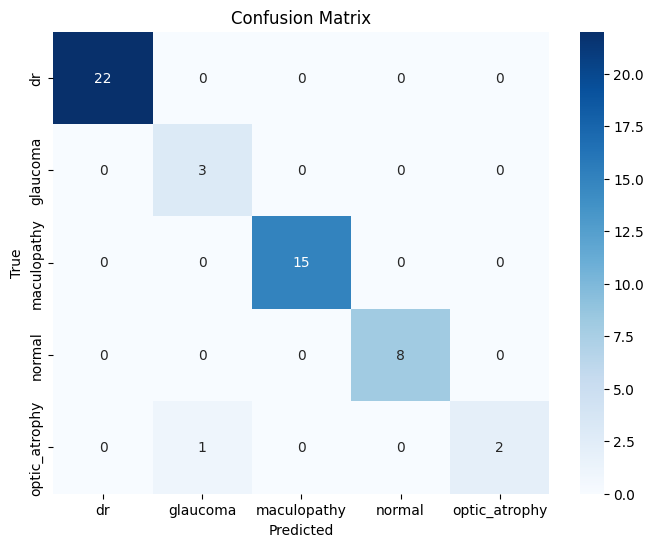

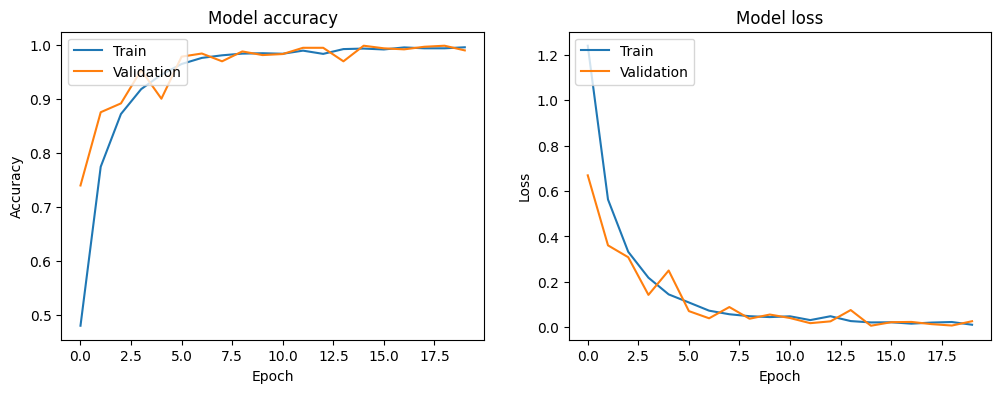

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG19
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

# Set paths (update these paths if needed)
train_dir = '/kaggle/input/dataset/Traindatasets/Traindatasets/Merge_datasets'  # Replace with your training data directory
test_dir = '/kaggle/input/dataset/Testdata'  # Replace with your test data directory

# Data augmentation and preprocessing for training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2)  # Using 20% of the training data for validation

# Data augmentation and preprocessing for validation and test data
test_datagen = ImageDataGenerator(rescale=1./255)

# Create generators
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training')
validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation')
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False)

# Verify the number of classes
print("Training classes:", train_generator.class_indices)
print("Validation classes:", validation_generator.class_indices)
print("Testing classes:", test_generator.class_indices)

# Load the VGG-19 model pre-trained on ImageNet, excluding the top layers
base_model = VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Unfreeze some layers for fine-tuning
for layer in base_model.layers[-4:]:  # Unfreeze the last 4 layers
    layer.trainable = True

# Add custom top layers
x = base_model.output
x = Flatten()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)  # Add dropout layer
x = Dense(5, activation='softmax')(x)  # Updated to 5 classes

# Create the final model
model = Model(inputs=base_model.input, outputs=x)

# Compile the model with a lower learning rate for fine-tuning
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5), loss='categorical_crossentropy', metrics=['accuracy'])

# Set callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1)
model_checkpoint = ModelCheckpoint('vgg19_best_model.keras', save_best_only=True, monitor='val_loss', mode='min')
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-7, verbose=1)

# Train the model
history = model.fit(
    train_generator,
    epochs=20,
    validation_data=validation_generator,
    callbacks=[early_stopping, model_checkpoint, reduce_lr])

# Load the best model
best_model = tf.keras.models.load_model('vgg19_best_model.keras')

# Evaluate on test data
test_loss, test_accuracy = best_model.evaluate(test_generator)
print(f'Test accuracy: {test_accuracy * 100:.2f}%')

# Get true labels and predictions
y_true = test_generator.classes
y_pred = np.argmax(best_model.predict(test_generator), axis=-1)

# Print classification report
target_names = list(test_generator.class_indices.keys())
print('Classification Report')
print(classification_report(y_true, y_pred, target_names=target_names))

# Plot confusion matrix as heatmap
conf_matrix = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

**VGG-16 model**

Found 4170 images belonging to 5 classes.
Found 1040 images belonging to 5 classes.
Found 51 images belonging to 5 classes.
Training classes: {'dr': 0, 'glaucoma': 1, 'maculopathy': 2, 'normal': 3, 'optic atrophy': 4}
Validation classes: {'dr': 0, 'glaucoma': 1, 'maculopathy': 2, 'normal': 3, 'optic atrophy': 4}
Testing classes: {'dr': 0, 'glaucoma': 1, 'maculopathy': 2, 'normal': 3, 'optic_atrophy': 4}
58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/20


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


131/131 ━━━━━━━━━━━━━━━━━━━━ 254s 2s/step - accuracy: 0.3188 - loss: 1.5787 - val_accuracy: 0.6308 - val_loss: 0.8691 - learning_rate: 1.0000e-05
Epoch 2/20
131/131 ━━━━━━━━━━━━━━━━━━━━ 240s 2s/step - accuracy: 0.7463 - loss: 0.6442 - val_accuracy: 0.9058 - val_loss: 0.2652 - learning_rate: 1.0000e-05
Epoch 3/20
131/131 ━━━━━━━━━━━━━━━━━━━━ 241s 2s/step - accuracy: 0.8947 - loss: 0.2890 - val_accuracy: 0.9048 - val_loss: 0.2446 - learning_rate: 1.0000e-05
Epoch 4/20
131/131 ━━━━━━━━━━━━━━━━━━━━ 242s 2s/step - accuracy: 0.9335 - loss: 0.1760 - val_accuracy: 0.9760 - val_loss: 0.0759 - learning_rate: 1.0000e-05
Epoch 5/20
131/131 ━━━━━━━━━━━━━━━━━━━━ 239s 2s/step - accuracy: 0.9579 - loss: 0.1185 - val_accuracy: 0.9692 - val_loss: 0.0867 - learning_rate: 1.0000e-05
Epoch 6/20
131/131 ━━━━━━━━━━━━━━━━━━━━ 242s 2s/step - accuracy: 0.9707 - loss: 0.0792 - val_accuracy: 0.9721 - val_loss: 0.0791 - learning_rate: 1.0000e-05
Epoch 7/20
131/131 ━━━━━━━━━━━━━━━━━━━━ 240s 2s/step - accuracy: 0.97

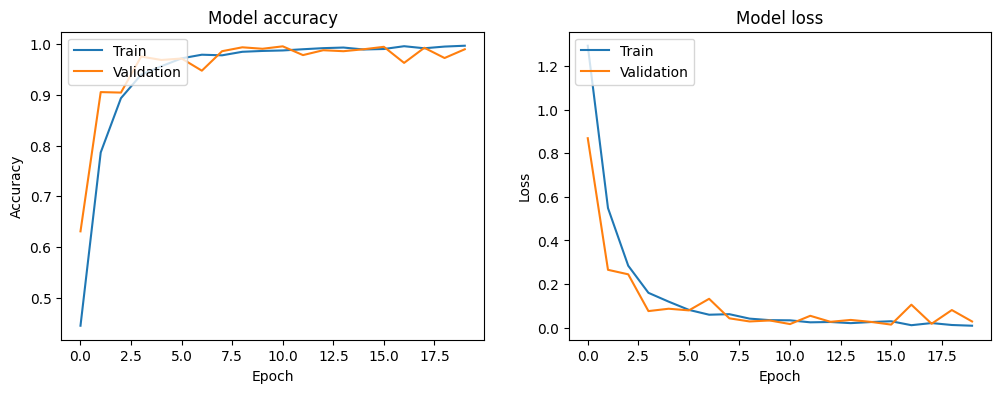

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
import matplotlib.pyplot as plt
import os
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

# Set paths (update these paths if needed)
train_dir = '/kaggle/input/dataset/Traindatasets/Traindatasets/Merge_datasets'  # Replace with your training data directory
test_dir = '/kaggle/input/dataset/Testdata'    # Replace with your test data directory

# Data augmentation and preprocessing for training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2)  # Using 20% of the training data for validation

# Data augmentation and preprocessing for validation and test data
test_datagen = ImageDataGenerator(rescale=1./255)

# Create generators
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training')

validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation')

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False)

# Verify the number of classes
print("Training classes:", train_generator.class_indices)
print("Validation classes:", validation_generator.class_indices)
print("Testing classes:", test_generator.class_indices)

# Load the VGG-16 model pre-trained on ImageNet, excluding the top layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Unfreeze some layers for fine-tuning
for layer in base_model.layers[-4:]:  # Unfreeze the last 4 layers
    layer.trainable = True

# Add custom top layers
x = base_model.output
x = Flatten()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)  # Add dropout layer
x = Dense(5, activation='softmax')(x)  # Updated to 5 classes

# Create the final model
model = Model(inputs=base_model.input, outputs=x)

# Compile the model with a lower learning rate for fine-tuning
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5), loss='categorical_crossentropy', metrics=['accuracy'])

# Set callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1)
model_checkpoint = ModelCheckpoint('vgg16_best_model.keras', save_best_only=True, monitor='val_loss', mode='min')
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-7, verbose=1)

# Train the model
history = model.fit(
    train_generator,
    epochs=20,
    validation_data=validation_generator,
    callbacks=[early_stopping, model_checkpoint, reduce_lr])

# Load the best model
best_model = tf.keras.models.load_model('vgg16_best_model.keras')

# Evaluate on test data
test_loss, test_accuracy = best_model.evaluate(test_generator)
print(f'Test accuracy: {test_accuracy * 100:.2f}%')

# Get true labels and predictions
y_true = test_generator.classes
y_pred = np.argmax(best_model.predict(test_generator), axis=-1)

# Print confusion matrix
print('Confusion Matrix')
print(confusion_matrix(y_true, y_pred))

# Print classification report
target_names = list(test_generator.class_indices.keys())
print('Classification Report')
print(classification_report(y_true, y_pred, target_names=target_names))

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

**Alexnet model**

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import seaborn as sns
import os

# Define AlexNet
def alexnet_model(input_shape=(224, 224, 3), num_classes=5):
    model = models.Sequential()
    model.add(layers.Conv2D(96, (11, 11), strides=4, activation='relu', input_shape=input_shape))
    model.add(layers.MaxPooling2D((3, 3), strides=2))
    model.add(layers.Conv2D(256, (5, 5), padding='same', activation='relu'))
    model.add(layers.MaxPooling2D((3, 3), strides=2))
    model.add(layers.Conv2D(384, (3, 3), padding='same', activation='relu'))
    model.add(layers.Conv2D(384, (3, 3), padding='same', activation='relu'))
    model.add(layers.Conv2D(256, (3, 3), padding='same', activation='relu'))
    model.add(layers.MaxPooling2D((3, 3), strides=2))
    model.add(layers.Flatten())
    model.add(layers.Dense(4096, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(4096, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(num_classes, activation='softmax'))
    return model

# Set paths (update these paths if needed)
train_dir = '/kaggle/input/dataset/Traindatasets/Traindatasets/Merge_datasets'
test_dir = '/kaggle/input/dataset/Testdata'

# Data augmentation and preprocessing for training and validation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2)

# Data preprocessing for test data
test_datagen = ImageDataGenerator(rescale=1./255)

# Create generators
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training')

validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation')

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical')

# Create directory for saving model and evaluation details
model_name = 'AlexNet'
save_dir = f'/kaggle/working/models/{model_name}/'
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

# Initialize and compile AlexNet
model = alexnet_model(input_shape=(224, 224, 3), num_classes=5)
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])

# Set callbacks
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, verbose=1)
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(os.path.join(save_dir, f'{model_name}_best_model.keras'), save_best_only=True, monitor='val_loss', mode='min')
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-7, verbose=1)

# Train the model
history = model.fit(
    train_generator,
    epochs=20,
    validation_data=validation_generator,
    callbacks=[early_stopping, model_checkpoint, reduce_lr])

# Save the final trained model
model.save(os.path.join(save_dir, f'{model_name}.keras'))
print(f"{model_name} model saved successfully!")

# Load the best model
best_model = tf.keras.models.load_model(os.path.join(save_dir, f'{model_name}_best_model.keras'))

# Evaluate on test data
test_loss, test_accuracy = best_model.evaluate(test_generator)
print(f'Test accuracy: {test_accuracy * 100:.2f}%')

# Get true labels and predictions from the test set
y_true = test_generator.classes
y_pred = np.argmax(best_model.predict(test_generator), axis=-1)

# Save confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)
conf_matrix_df = pd.DataFrame(conf_matrix, index=test_generator.class_indices.keys(), columns=test_generator.class_indices.keys())
conf_matrix_df.to_csv(os.path.join(save_dir, 'confusion_matrix.csv'))
print(f"{model_name} confusion matrix saved successfully!")

# Save classification report
target_names = list(test_generator.class_indices.keys())
class_report = classification_report(y_true, y_pred, target_names=target_names, output_dict=True)
class_report_df = pd.DataFrame(class_report).transpose()
class_report_df.to_csv(os.path.join(save_dir, 'classification_report.csv'))
print(f"{model_name} classification report saved successfully!")

# Plot and save the confusion matrix heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_df, annot=True, fmt="d", cmap="Blues")
plt.title(f'{model_name} Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.savefig(os.path.join(save_dir, 'confusion_matrix_heatmap.png'))
plt.show()

# Plot and save training & validation accuracy and loss curves
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title(f'{model_name} Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.savefig(os.path.join(save_dir, 'accuracy_curve.png'))

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title(f'{model_name} Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.savefig(os.path.join(save_dir, 'loss_curve.png'))

plt.show()
print(f"{model_name} training and validation curves saved successfully!")

**Resnet-50**

Found 4170 images belonging to 5 classes.
Found 1040 images belonging to 5 classes.
Found 51 images belonging to 5 classes.
Training classes: {'dr': 0, 'glaucoma': 1, 'maculopathy': 2, 'normal': 3, 'optic atrophy': 4}
Validation classes: {'dr': 0, 'glaucoma': 1, 'maculopathy': 2, 'normal': 3, 'optic atrophy': 4}
Testing classes: {'dr': 0, 'glaucoma': 1, 'maculopathy': 2, 'normal': 3, 'optic_atrophy': 4}
94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/20


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1739377837.087036     122 service.cc:145] XLA service 0x7f95a8003700 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1739377837.087147     122 service.cc:153]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1739377864.622883     122 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_23', 16 bytes spill stores, 16 bytes spill loads

I0000 00:00:1739377864.665624     122 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the

131/131 ━━━━━━━━━━━━━━━━━━━━ 380s 2s/step - accuracy: 0.4637 - loss: 2.0476 - val_accuracy: 0.1904 - val_loss: 1.6966 - learning_rate: 1.0000e-05
Epoch 2/20
131/131 ━━━━━━━━━━━━━━━━━━━━ 244s 2s/step - accuracy: 0.8028 - loss: 0.5270 - val_accuracy: 0.1731 - val_loss: 1.7894 - learning_rate: 1.0000e-05
Epoch 3/20
131/131 ━━━━━━━━━━━━━━━━━━━━ 236s 2s/step - accuracy: 0.8779 - loss: 0.3051 - val_accuracy: 0.1952 - val_loss: 1.8055 - learning_rate: 1.0000e-05
Epoch 4/20
131/131 ━━━━━━━━━━━━━━━━━━━━ 241s 2s/step - accuracy: 0.9179 - loss: 0.2365 - val_accuracy: 0.3192 - val_loss: 1.6565 - learning_rate: 1.0000e-05
Epoch 5/20
131/131 ━━━━━━━━━━━━━━━━━━━━ 237s 2s/step - accuracy: 0.9378 - loss: 0.1653 - val_accuracy: 0.3702 - val_loss: 1.6942 - learning_rate: 1.0000e-05
Epoch 6/20
131/131 ━━━━━━━━━━━━━━━━━━━━ 232s 2s/step - accuracy: 0.9611 - loss: 0.1045 - val_accuracy: 0.5635 - val_loss: 1.1736 - learning_rate: 1.0000e-05
Epoch 7/20
131/131 ━━━━━━━━━━━━━━━━━━━━ 228s 2s/step - accuracy: 0.95

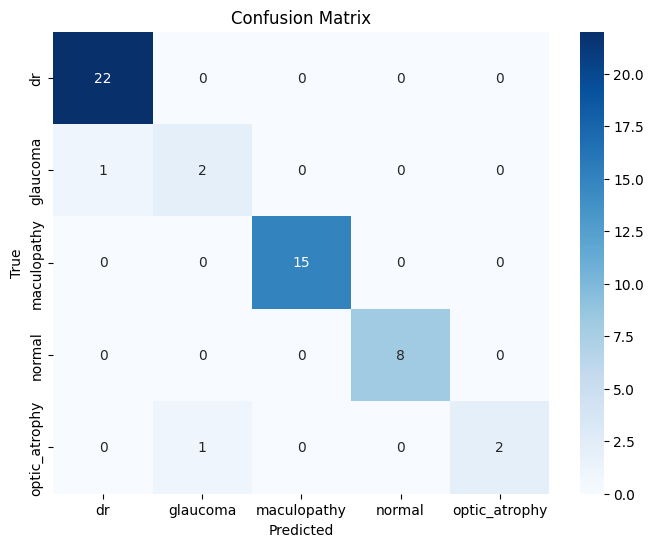

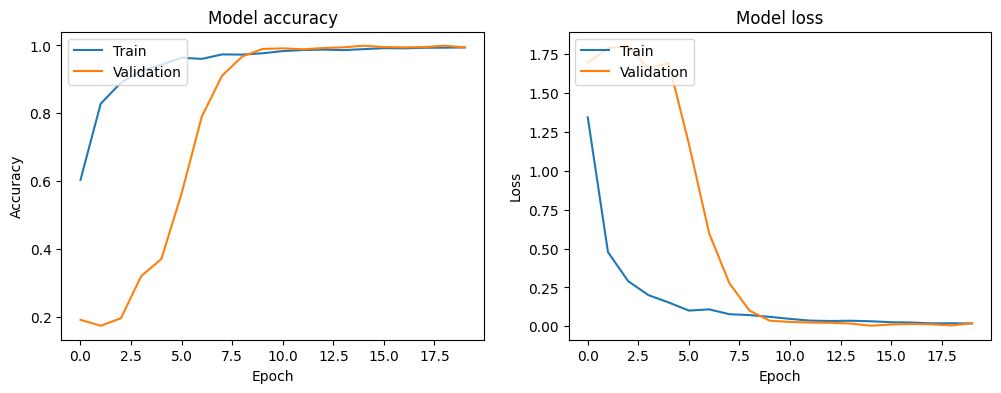

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

# Set paths (update these paths if needed)
train_dir = '/kaggle/input/dataset/Traindatasets/Traindatasets/Merge_datasets'  # Replace with your training data directory
test_dir = '/kaggle/input/dataset/Testdata'  # Replace with your test data directory

# Data augmentation and preprocessing for training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2)  # Using 20% of the training data for validation

# Data augmentation and preprocessing for validation and test data
test_datagen = ImageDataGenerator(rescale=1./255)

# Create generators
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training')
validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation')
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False)

# Verify the number of classes
print("Training classes:", train_generator.class_indices)
print("Validation classes:", validation_generator.class_indices)
print("Testing classes:", test_generator.class_indices)

# Load the ResNet-50 model pre-trained on ImageNet, excluding the top layers
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Unfreeze some layers for fine-tuning
for layer in base_model.layers[-4:]:  # Unfreeze the last 4 layers
    layer.trainable = True

# Add custom top layers
x = base_model.output
x = Flatten()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)  # Add dropout layer
x = Dense(5, activation='softmax')(x)  # Updated to 5 classes

# Create the final model
model = Model(inputs=base_model.input, outputs=x)

# Compile the model with a lower learning rate for fine-tuning
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5), loss='categorical_crossentropy', metrics=['accuracy'])

# Set callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1)
model_checkpoint = ModelCheckpoint('resnet50_best_model.keras', save_best_only=True, monitor='val_loss', mode='min')
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-7, verbose=1)

# Train the model
history = model.fit(
    train_generator,
    epochs=20,
    validation_data=validation_generator,
    callbacks=[early_stopping, model_checkpoint, reduce_lr])

# Load the best model
best_model = tf.keras.models.load_model('resnet50_best_model.keras')

# Evaluate on test data
test_loss, test_accuracy = best_model.evaluate(test_generator)
print(f'Test accuracy: {test_accuracy * 100:.2f}%')

# Get true labels and predictions
y_true = test_generator.classes
y_pred = np.argmax(best_model.predict(test_generator), axis=-1)

# Print classification report
target_names = list(test_generator.class_indices.keys())
print('Classification Report')
print(classification_report(y_true, y_pred, target_names=target_names))

# Plot confusion matrix as heatmap
conf_matrix = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

**Resnet-101**

Found 4170 images belonging to 5 classes.
Found 1040 images belonging to 5 classes.
Found 51 images belonging to 5 classes.
Training classes: {'dr': 0, 'glaucoma': 1, 'maculopathy': 2, 'normal': 3, 'optic atrophy': 4}
Validation classes: {'dr': 0, 'glaucoma': 1, 'maculopathy': 2, 'normal': 3, 'optic atrophy': 4}
Testing classes: {'dr': 0, 'glaucoma': 1, 'maculopathy': 2, 'normal': 3, 'optic_atrophy': 4}
Epoch 1/20
131/131 ━━━━━━━━━━━━━━━━━━━━ 372s 2s/step - accuracy: 0.4809 - loss: 12.3147 - val_accuracy: 0.2077 - val_loss: 13.1511 - learning_rate: 1.0000e-05
Epoch 2/20
131/131 ━━━━━━━━━━━━━━━━━━━━ 228s 2s/step - accuracy: 0.8346 - loss: 10.5341 - val_accuracy: 0.2077 - val_loss: 18.0005 - learning_rate: 1.0000e-05
Epoch 3/20
131/131 ━━━━━━━━━━━━━━━━━━━━ 230s 2s/step - accuracy: 0.8906 - loss: 10.2397 - val_accuracy: 0.1702 - val_loss: 19.5727 - learning_rate: 1.0000e-05
Epoch 4/20
131/131 ━━━━━━━━━━━━━━━━━━━━ 228s 2s/step - accuracy: 0.9412 - loss: 9.9227 - val_accuracy: 0.1817 - val_

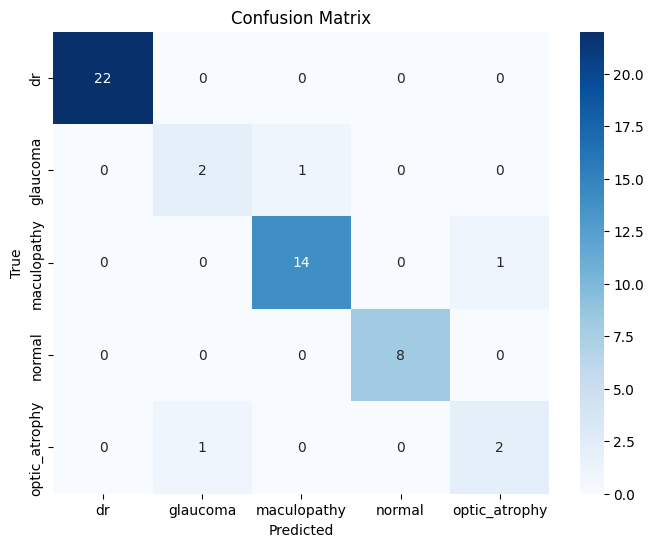

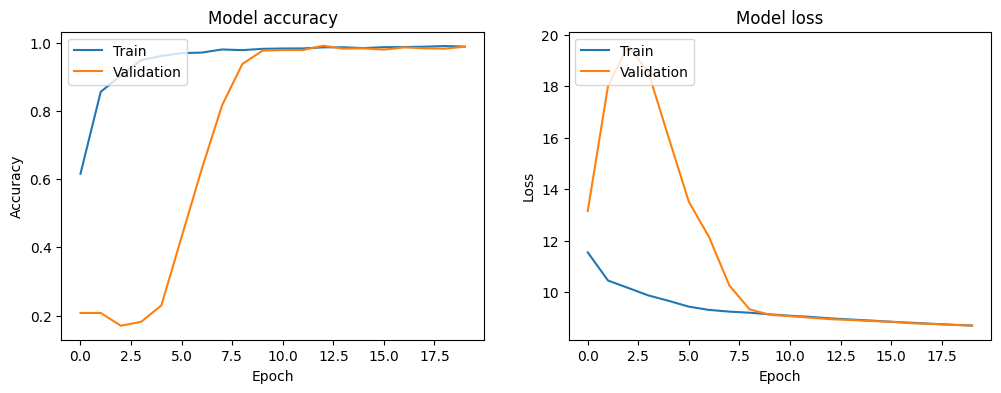

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet101
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau, LearningRateScheduler
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.regularizers import l2

# Set paths (update these paths if needed)
train_dir = '/kaggle/input/dataset/Traindatasets/Traindatasets/Merge_datasets'  # Replace with your training data directory
test_dir = '/kaggle/input/dataset/Testdata'  # Replace with your test data directory

# Data augmentation and preprocessing for training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2)  # Using 20% of the training data for validation

# Data augmentation and preprocessing for validation and test data
test_datagen = ImageDataGenerator(rescale=1./255)

# Create generators
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training')
validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation')
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False)

# Verify the number of classes
print("Training classes:", train_generator.class_indices)
print("Validation classes:", validation_generator.class_indices)
print("Testing classes:", test_generator.class_indices)

# Load the ResNet-101 model pre-trained on ImageNet, excluding the top layers
base_model = ResNet101(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Unfreeze more layers for fine-tuning
for layer in base_model.layers[-10:]:  # Unfreeze the last 10 layers
    layer.trainable = True

# Add custom top layers with L2 regularization
x = base_model.output
x = Flatten()(x)
x = Dense(512, activation='relu', kernel_regularizer=l2(0.01))(x)
x = Dropout(0.5)(x)  # Add dropout layer
x = Dense(5, activation='softmax', kernel_regularizer=l2(0.01))(x)  # Updated to 5 classes

# Create the final model
model = Model(inputs=base_model.input, outputs=x)

# Compile the model with a lower learning rate for fine-tuning
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5), loss='categorical_crossentropy', metrics=['accuracy'])

# Learning rate scheduler
def scheduler(epoch, lr):
    if epoch < 10:
        return lr
    else:
        return float(lr * tf.math.exp(-0.1))

lr_scheduler = LearningRateScheduler(scheduler)

# Set callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1)
model_checkpoint = ModelCheckpoint('resnet101_best_model.keras', save_best_only=True, monitor='val_loss', mode='min')
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-7, verbose=1)

# Train the model
history = model.fit(
    train_generator,
    epochs=20,
    validation_data=validation_generator,
    callbacks=[early_stopping, model_checkpoint, reduce_lr, lr_scheduler])

# Load the best model
best_model = tf.keras.models.load_model('resnet101_best_model.keras')

# Evaluate on test data
test_loss, test_accuracy = best_model.evaluate(test_generator)
print(f'Test accuracy: {test_accuracy * 100:.2f}%')

# Get true labels and predictions
y_true = test_generator.classes
y_pred = np.argmax(best_model.predict(test_generator), axis=-1)

# Print classification report
target_names = list(test_generator.class_indices.keys())
print('Classification Report')
print(classification_report(y_true, y_pred, target_names=target_names))

# Plot confusion matrix as heatmap
conf_matrix = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

**LCNN - 9**

Found 4170 images belonging to 5 classes.
Found 1040 images belonging to 5 classes.
Found 51 images belonging to 5 classes.
Training classes: {'dr': 0, 'glaucoma': 1, 'maculopathy': 2, 'normal': 3, 'optic atrophy': 4}
Validation classes: {'dr': 0, 'glaucoma': 1, 'maculopathy': 2, 'normal': 3, 'optic atrophy': 4}
Testing classes: {'dr': 0, 'glaucoma': 1, 'maculopathy': 2, 'normal': 3, 'optic_atrophy': 4}
Epoch 1/20


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1739339760.470689     115 service.cc:145] XLA service 0x7eb098018570 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1739339760.470746     115 service.cc:153]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
2025-02-12 05:56:13.864952: E external/local_xla/xla/service/slow_operation_alarm.cc:65] Trying algorithm eng0{} for conv (f32[256,96,5,5]{3,2,1,0}, u8[0]{0}) custom-call(f32[32,96,112,112]{3,2,1,0}, f32[32,256,112,112]{3,2,1,0}), window={size=5x5 pad=2_2x2_2}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBackwardF

  1/131 ━━━━━━━━━━━━━━━━━━━━ 1:42:03 47s/step - accuracy: 0.1250 - loss: 2.0919

I0000 00:00:1739339785.998849     115 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


 49/131 ━━━━━━━━━━━━━━━━━━━━ 2:55 2s/step - accuracy: 0.2776 - loss: 5.0953

2025-02-12 05:58:16.587576: E external/local_xla/xla/service/slow_operation_alarm.cc:65] Trying algorithm eng0{} for conv (f32[256,96,5,5]{3,2,1,0}, u8[0]{0}) custom-call(f32[10,96,112,112]{3,2,1,0}, f32[10,256,112,112]{3,2,1,0}), window={size=5x5 pad=2_2x2_2}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBackwardFilter", backend_config={"operation_queue_id":"0","wait_on_operation_queues":[],"cudnn_conv_backend_config":{"conv_result_scale":1,"activation_mode":"kNone","side_input_scale":0,"leakyrelu_alpha":0}} is taking a while...
2025-02-12 05:58:18.523427: E external/local_xla/xla/service/slow_operation_alarm.cc:133] The operation took 2.935959457s
Trying algorithm eng0{} for conv (f32[256,96,5,5]{3,2,1,0}, u8[0]{0}) custom-call(f32[10,96,112,112]{3,2,1,0}, f32[10,256,112,112]{3,2,1,0}), window={size=5x5 pad=2_2x2_2}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBackwardFilter", backend_config={"operation_queue_id":"0","wait_on_operation_queues":[],"cudnn

131/131 ━━━━━━━━━━━━━━━━━━━━ 368s 2s/step - accuracy: 0.3829 - loss: 3.2761 - val_accuracy: 0.1865 - val_loss: 1.6936 - learning_rate: 1.0000e-04
Epoch 2/20
131/131 ━━━━━━━━━━━━━━━━━━━━ 229s 2s/step - accuracy: 0.7350 - loss: 0.7378 - val_accuracy: 0.2385 - val_loss: 1.7427 - learning_rate: 1.0000e-04
Epoch 3/20
131/131 ━━━━━━━━━━━━━━━━━━━━ 235s 2s/step - accuracy: 0.8300 - loss: 0.4677 - val_accuracy: 0.4308 - val_loss: 1.5603 - learning_rate: 1.0000e-04
Epoch 4/20
131/131 ━━━━━━━━━━━━━━━━━━━━ 234s 2s/step - accuracy: 0.8608 - loss: 0.3869 - val_accuracy: 0.7567 - val_loss: 0.6249 - learning_rate: 1.0000e-04
Epoch 5/20
131/131 ━━━━━━━━━━━━━━━━━━━━ 234s 2s/step - accuracy: 0.8989 - loss: 0.2848 - val_accuracy: 0.8635 - val_loss: 0.3596 - learning_rate: 1.0000e-04
Epoch 6/20
131/131 ━━━━━━━━━━━━━━━━━━━━ 233s 2s/step - accuracy: 0.9111 - loss: 0.2484 - val_accuracy: 0.9298 - val_loss: 0.1769 - learning_rate: 1.0000e-04
Epoch 7/20
131/131 ━━━━━━━━━━━━━━━━━━━━ 237s 2s/step - accuracy: 0.93

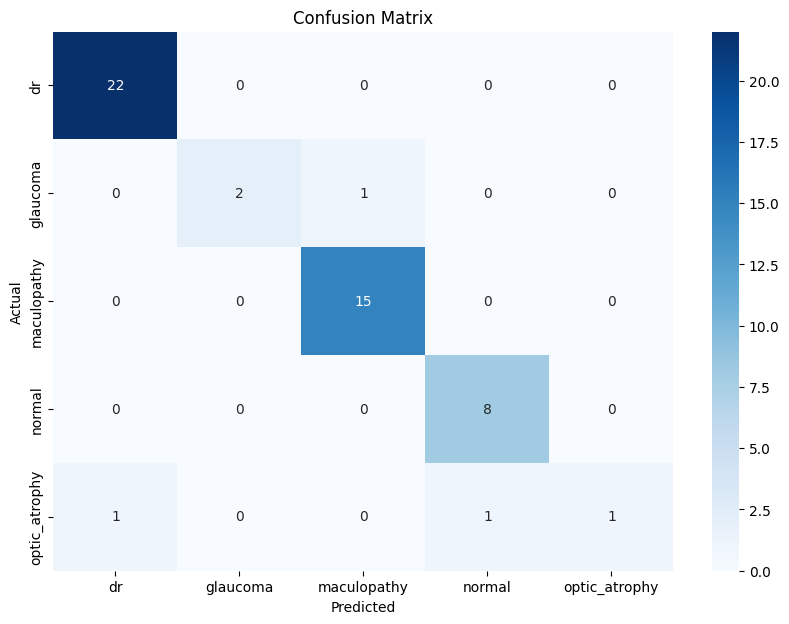

Confusion Matrix
[[22  0  0  0  0]
 [ 0  2  1  0  0]
 [ 0  0 15  0  0]
 [ 0  0  0  8  0]
 [ 1  0  0  1  1]]
Classification Report
               precision    recall  f1-score   support

           dr       0.96      1.00      0.98        22
     glaucoma       1.00      0.67      0.80         3
  maculopathy       0.94      1.00      0.97        15
       normal       0.89      1.00      0.94         8
optic_atrophy       1.00      0.33      0.50         3

     accuracy                           0.94        51
    macro avg       0.96      0.80      0.84        51
 weighted avg       0.95      0.94      0.93        51



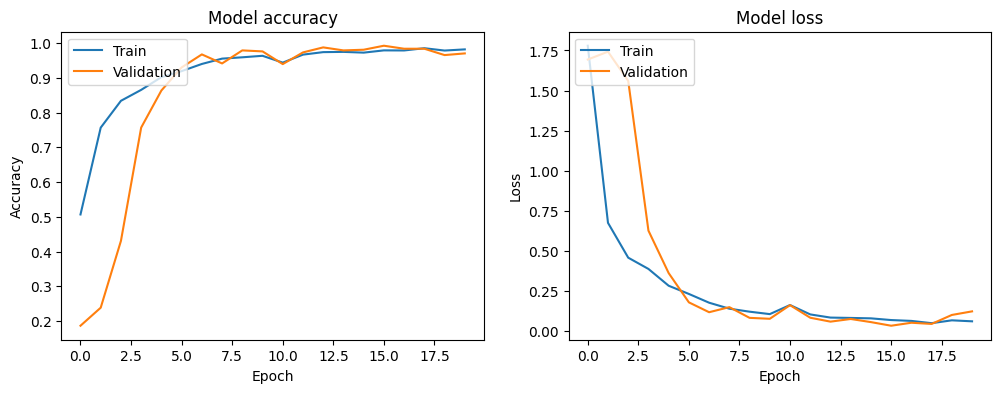

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, BatchNormalization, MaxPooling2D, Flatten, Dense, Input, PReLU
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Function to build the LightCNN-9 model
def build_lightcnn_9(input_shape, num_classes):
    inputs = Input(shape=input_shape)

    x = Conv2D(96, (5, 5), strides=1, padding='same')(inputs)
    x = BatchNormalization()(x)
    x = PReLU()(x)
    x = MaxPooling2D((2, 2), strides=2)(x)

    x = Conv2D(256, (5, 5), strides=1, padding='same')(x)
    x = BatchNormalization()(x)
    x = PReLU()(x)
    x = MaxPooling2D((2, 2), strides=2)(x)

    x = Conv2D(384, (3, 3), strides=1, padding='same')(x)
    x = BatchNormalization()(x)
    x = PReLU()(x)
    x = MaxPooling2D((2, 2), strides=2)(x)

    x = Conv2D(256, (3, 3), strides=1, padding='same')(x)
    x = BatchNormalization()(x)
    x = PReLU()(x)
    x = MaxPooling2D((2, 2), strides=2)(x)

    x = Flatten()(x)
    x = Dense(512)(x)
    x = PReLU()(x)
    x = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs, x)
    return model

# Set paths (update these paths if needed)
train_dir = '/kaggle/input/dataset/Traindatasets/Traindatasets/Merge_datasets'  # Replace with your training data directory
test_dir = '/kaggle/input/dataset/Testdata'    # Replace with your test data directory

# Data augmentation and preprocessing for training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2)  # Using 20% of the training data for validation

# Data augmentation and preprocessing for validation and test data
test_datagen = ImageDataGenerator(rescale=1./255)

# Create generators
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training')

validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation')

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False)

# Verify the number of classes
print("Training classes:", train_generator.class_indices)
print("Validation classes:", validation_generator.class_indices)
print("Testing classes:", test_generator.class_indices)

# Build the LightCNN-9 model
num_classes = len(train_generator.class_indices)
input_shape = (224, 224, 3)
model = build_lightcnn_9(input_shape, num_classes)

# Compile the model with a lower learning rate for fine-tuning
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])

# Set callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1)
model_checkpoint = ModelCheckpoint('lightcnn9_best_model.keras', save_best_only=True, monitor='val_loss', mode='min')
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-7, verbose=1)

# Train the model
history = model.fit(
    train_generator,
    epochs=20,
    validation_data=validation_generator,
    callbacks=[early_stopping, model_checkpoint, reduce_lr])

# Load the best model
best_model = tf.keras.models.load_model('lightcnn9_best_model.keras')

# Evaluate on test data
test_loss, test_accuracy = best_model.evaluate(test_generator)
print(f'Test accuracy: {test_accuracy * 100:.2f}%')

# Get true labels and predictions
y_true = test_generator.classes
y_pred = np.argmax(best_model.predict(test_generator), axis=-1)

# Define the target names
target_names = list(test_generator.class_indices.keys())

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

# Print confusion matrix
print('Confusion Matrix')
print(confusion_matrix(y_true, y_pred))

# Print classification report
print('Classification Report')
print(classification_report(y_true, y_pred, target_names=target_names))

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

**LCNN_29**

Found 4170 images belonging to 5 classes.
Found 1040 images belonging to 5 classes.
Found 51 images belonging to 5 classes.
Training classes: {'dr': 0, 'glaucoma': 1, 'maculopathy': 2, 'normal': 3, 'optic atrophy': 4}
Validation classes: {'dr': 0, 'glaucoma': 1, 'maculopathy': 2, 'normal': 3, 'optic atrophy': 4}
Testing classes: {'dr': 0, 'glaucoma': 1, 'maculopathy': 2, 'normal': 3, 'optic_atrophy': 4}
Epoch 1/40


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


131/131 ━━━━━━━━━━━━━━━━━━━━ 361s 2s/step - accuracy: 0.2572 - loss: 3.8930 - val_accuracy: 0.2048 - val_loss: 1.6686 - learning_rate: 1.0000e-04
Epoch 2/40
131/131 ━━━━━━━━━━━━━━━━━━━━ 317s 2s/step - accuracy: 0.3998 - loss: 1.3924 - val_accuracy: 0.2048 - val_loss: 1.8425 - learning_rate: 1.0000e-04
Epoch 3/40
131/131 ━━━━━━━━━━━━━━━━━━━━ 317s 2s/step - accuracy: 0.5710 - loss: 1.0842 - val_accuracy: 0.2067 - val_loss: 1.9977 - learning_rate: 1.0000e-04
Epoch 4/40
131/131 ━━━━━━━━━━━━━━━━━━━━ 317s 2s/step - accuracy: 0.6817 - loss: 0.8427 - val_accuracy: 0.2798 - val_loss: 1.8557 - learning_rate: 1.0000e-04
Epoch 5/40
131/131 ━━━━━━━━━━━━━━━━━━━━ 322s 2s/step - accuracy: 0.7712 - loss: 0.6391 - val_accuracy: 0.5904 - val_loss: 1.0470 - learning_rate: 1.0000e-04
Epoch 6/40
131/131 ━━━━━━━━━━━━━━━━━━━━ 321s 2s/step - accuracy: 0.8263 - loss: 0.4765 - val_accuracy: 0.8760 - val_loss: 0.3593 - learning_rate: 1.0000e-04
Epoch 7/40
131/131 ━━━━━━━━━━━━━━━━━━━━ 317s 2s/step - accuracy: 0.86

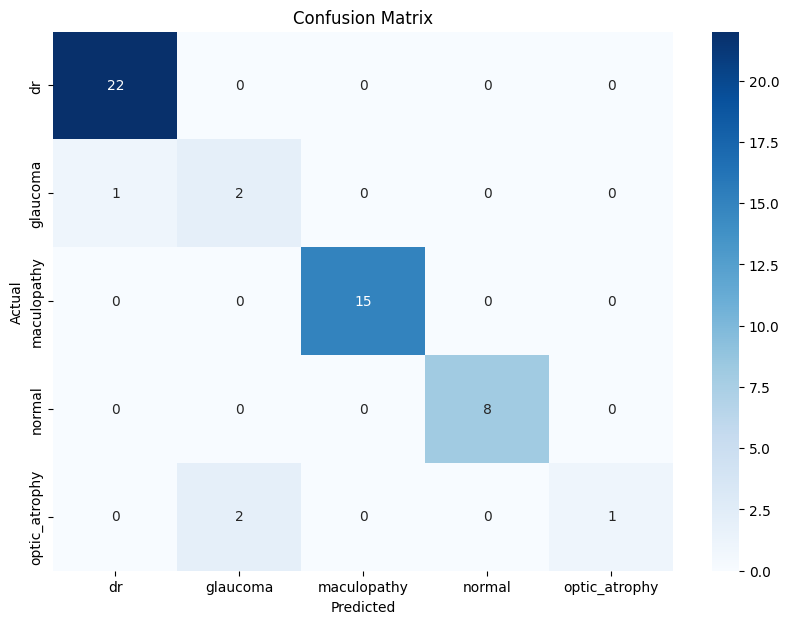

Confusion Matrix
[[22  0  0  0  0]
 [ 1  2  0  0  0]
 [ 0  0 15  0  0]
 [ 0  0  0  8  0]
 [ 0  2  0  0  1]]
Classification Report
               precision    recall  f1-score   support

           dr       0.96      1.00      0.98        22
     glaucoma       0.50      0.67      0.57         3
  maculopathy       1.00      1.00      1.00        15
       normal       1.00      1.00      1.00         8
optic_atrophy       1.00      0.33      0.50         3

     accuracy                           0.94        51
    macro avg       0.89      0.80      0.81        51
 weighted avg       0.95      0.94      0.94        51



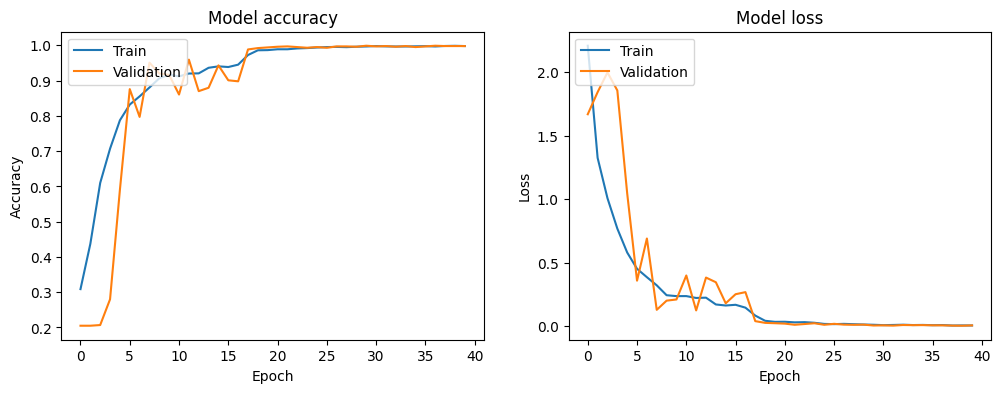

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, BatchNormalization, MaxPooling2D, Flatten, Dense, Input, PReLU
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Function to build the LightCNN-29 model
def build_lightcnn_29(input_shape, num_classes):
    inputs = Input(shape=input_shape)

    for _ in range(3):  # Block 1
        x = Conv2D(96, (5, 5), strides=1, padding='same')(inputs if _ == 0 else x)
        x = BatchNormalization()(x)
        x = PReLU()(x)
    x = MaxPooling2D((2, 2), strides=2)(x)

    for _ in range(5):  # Block 2
        x = Conv2D(256, (5, 5), strides=1, padding='same')(x)
        x = BatchNormalization()(x)
        x = PReLU()(x)
    x = MaxPooling2D((2, 2), strides=2)(x)

    for _ in range(9):  # Block 3
        x = Conv2D(384, (3, 3), strides=1, padding='same')(x)
        x = BatchNormalization()(x)
        x = PReLU()(x)
    x = MaxPooling2D((2, 2), strides=2)(x)

    for _ in range(12):  # Block 4
        x = Conv2D(256, (3, 3), strides=1, padding='same')(x)
        x = BatchNormalization()(x)
        x = PReLU()(x)
    x = MaxPooling2D((2, 2), strides=2)(x)

    x = Flatten()(x)
    x = Dense(512)(x)
    x = PReLU()(x)
    x = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs, x)
    return model

# Set paths (update these paths if needed)
train_dir = '/kaggle/input/dataset/Traindatasets/Traindatasets/Merge_datasets'  # Replace with your training data directory
test_dir = '/kaggle/input/dataset/Testdata'    # Replace with your test data directory

# Data augmentation and preprocessing for training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2)  # Using 20% of the training data for validation

# Data augmentation and preprocessing for validation and test data
test_datagen = ImageDataGenerator(rescale=1./255)

# Create generators
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training')

validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation')

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False)

# Verify the number of classes
print("Training classes:", train_generator.class_indices)
print("Validation classes:", validation_generator.class_indices)
print("Testing classes:", test_generator.class_indices)

# Build the LightCNN-29 model
num_classes = len(train_generator.class_indices)
input_shape = (224, 224, 3)
model = build_lightcnn_29(input_shape, num_classes)

# Compile the model with a lower learning rate for fine-tuning
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])

# Set callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1)
model_checkpoint = ModelCheckpoint('lightcnn29_best_model.keras', save_best_only=True, monitor='val_loss', mode='min')
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-7, verbose=1)

# Train the model
history = model.fit(
    train_generator,
    epochs=40,
    validation_data=validation_generator,
    callbacks=[early_stopping, model_checkpoint, reduce_lr])

# Load the best model
best_model = tf.keras.models.load_model('lightcnn29_best_model.keras')

# Evaluate on test data
test_loss, test_accuracy = best_model.evaluate(test_generator)
print(f'Test accuracy: {test_accuracy * 100:.2f}%')

# Get true labels and predictions
y_true = test_generator.classes
y_pred = np.argmax(best_model.predict(test_generator), axis=-1)

# Define the target names
target_names = list(test_generator.class_indices.keys())

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

# Print confusion matrix
print('Confusion Matrix')
print(confusion_matrix(y_true, y_pred))

# Print classification report
print('Classification Report')
print(classification_report(y_true, y_pred, target_names=target_names))

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()
